## matrix operations

In [25]:
1+1

2

In [26]:
print(1+3)
print(3*2)
print(3**2)

4
6
9


In [27]:
import numpy as np

In [28]:
print(np.sqrt(81))

9.0


In [29]:
A = np.array([[3,2,1],[1,3,4],[8,9,3]]) # create a 3x3 array
print(A)

[[3 2 1]
 [1 3 4]
 [8 9 3]]


In [30]:
B = np.array([[4,3,0],[1,2,4],[7,2,1]])
print(B)

[[4 3 0]
 [1 2 4]
 [7 2 1]]


In [31]:
ZEROS = np.zeros([2,6])
print(ZEROS)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [32]:
C = A + B # element-wise sum
print(C)
print(C[0,0])

[[ 7  5  1]
 [ 2  5  8]
 [15 11  4]]
7


In [33]:
print(np.sum(C, axis = 0)) # sum along the columns

[24 21 13]


In [34]:
print(np.sum(C, axis = 1))

[13 15 30]


In [35]:
print(np.sum(C))

58


In [36]:
D = 2*C # scalar multiplication
print(D)

[[14 10  2]
 [ 4 10 16]
 [30 22  8]]


In [37]:
D = A * C # element-wise multiplication! It is not the standard matrix product
print(D)

[[ 21  10   1]
 [  2  15  32]
 [120  99  12]]


In [38]:
D = np.dot(A,C)     # Matrix product of two arrays
D = np.matmul(A,C)  # Matrix product of two arrays
D = A@C             # Matrix product of two arrays
print(D)

[[ 40  36  23]
 [ 73  64  41]
 [119 118  92]]


In [39]:
D = np.transpose(C) # transpose
print(D)

[[ 7  2 15]
 [ 5  5 11]
 [ 1  8  4]]


In [40]:
D = np.linalg.inv(A) # inverse of a matrix
print(D)

[[ 0.71052632 -0.07894737 -0.13157895]
 [-0.76315789 -0.02631579  0.28947368]
 [ 0.39473684  0.28947368 -0.18421053]]


In [41]:
E = np.dot(D,A) ## the matrix product of a matrix with its inverse is the identity matrix
print(E)

[[ 1.00000000e+00 -7.77156117e-16 -3.88578059e-16]
 [ 4.44089210e-16  1.00000000e+00  4.99600361e-16]
 [-2.22044605e-16 -3.33066907e-16  1.00000000e+00]]


Now we want to solve this system of linear equations:
- 7x + 5y - 3z = 16
- 3x - 5y + 2z = -8
- 5x + 3y - 7z = 0

Ax = B -> x = A^(-1)*B

In [42]:
A = np.array([[7,5,-3],[3,-5,2],[5,3,-7]])
B = np.array([[16],[-8],[0]])

In [43]:
X = np.dot(np.linalg.inv(A),B)
print(X)

[[1.]
 [3.]
 [2.]]


# Getting stock prices with the yfinance package

In [44]:
pip install yfinance

In [45]:
import pandas as pd # https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

We will download Apple stock’s price first.



In [46]:
AAPL = yf.download("AAPL", start="2012-01-01", end="2023-09-01")

[*********************100%%**********************]  1 of 1 completed


Let's look at the data.

In [47]:
AAPL
AAPL.head(10)
AAPL.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200
2023-08-21,175.070007,176.130005,173.740005,175.839996,175.839996,46311900
2023-08-22,177.059998,177.679993,176.250000,177.229996,177.229996,42084200
2023-08-23,178.520004,181.550003,178.330002,181.119995,181.119995,52722800
2023-08-24,180.669998,181.100006,176.009995,176.380005,176.380005,54945800
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


In [48]:
AAPL['Adj Close'][0]

12.466093063354492

We can plot the adjust close prices for Apple.

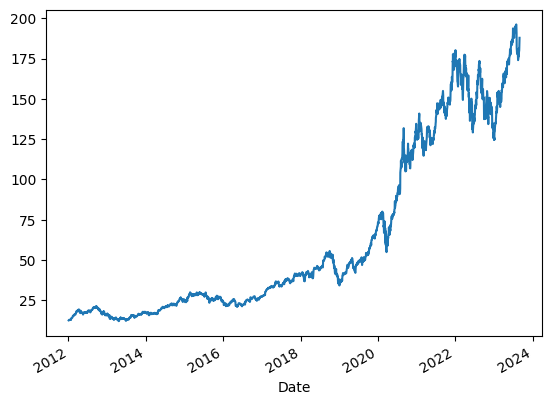

In [49]:
AAPL['Adj Close'].plot();

We can also download the data for multiple stocks

In [50]:
tickers = ["AAPL", "MSFT", "AMZN", "K", "O"] # apple, microsoft, amazon, kellogg's, realty income
prices = yf.download( tickers, start="2012-01-01", end="2023-09-01")

[*********************100%%**********************]  5 of 5 completed


In [51]:
prices.head(10)

Adj Close                                               Close  \
                 AAPL    AMZN          K       MSFT          O       AAPL   
Date                                                                        
2012-01-03  12.466093  8.9515  34.361561  21.321220  19.921267  14.686786   
2012-01-04  12.533087  8.8755  34.327496  21.822979  19.749622  14.765714   
2012-01-05  12.672230  8.8805  34.368359  22.045994  19.955599  14.929643   
2012-01-06  12.804702  9.1305  34.395599  22.388470  19.904099  15.085714   
2012-01-09  12.784389  8.9280  34.531780  22.093777  20.035673  15.061786   
2012-01-10  12.830165  8.9670  35.001659  22.173431  20.201601  15.115714   
2012-01-11  12.809247  8.9450  35.110615  22.077848  20.298861  15.091071   
2012-01-12  12.774090  8.7965  35.028889  22.300861  20.253082  15.049643   
2012-01-13  12.726187  8.9210  34.599884  22.499969  20.407560  14.993214   
2012-01-17  12.874424  9.0830  34.654373  22.507935  20.493374  15.167857   

                                                     ...       Open          \
              AMZN          K       MSFT          O  ...       AAPL    AMZN   
Date                                                 ...                      
2012-01-03  8.9515  50.459999  26.770000  33.740311  ...  14.621429  8.7945   
2012-01-04  8.8755  50.410000  27.400000  33.449612  ...  14.642857  8.9605   
2012-01-05  8.8805  50.470001  27.680000  33.798450  ...  14.819643  8.7970   
2012-01-06  9.1305  50.509998  28.110001  33.711239  ...  14.991786  8.9035   
2012-01-09  8.9280  50.709999  27.740000  33.934109  ...  15.196429  9.1380   
2012-01-10  8.9670  51.400002  27.840000  34.215115  ...  15.211071  9.0550   
2012-01-11  8.9450  51.560001  27.719999  34.379845  ...  15.095714  8.9820   
2012-01-12  8.7965  51.439999  28.000000  34.302326  ...  15.081429  8.9710   
2012-01-13  8.9210  50.810001  28.250000  34.563953  ...  14.989286  8.7905   
2012-01-17  9.0830  50.889999  28.260000  34.709301  ...  15.150000  9.0075   

                                                Volume                      \
                    K       MSFT          O       AAPL       AMZN        K   
Date                                                                         
2012-01-03  50.970001  26.549999  34.360466  302220800  102216000  1251800   
2012-01-04  50.509998  26.820000  33.575581  260022000   84104000  1085600   
2012-01-05  50.310001  27.379999  33.430233  271269600   76182000  1623100   
2012-01-06  50.730000  27.530001  33.924419  318292800  140168000  3649300   
2012-01-09  50.709999  28.049999  33.914730  394024400  101138000  1283900   
2012-01-10  50.959999  27.930000  34.069767  258196400   79716000  2480100   
2012-01-11  51.299999  27.430000  34.234497  215084800   62054000  1700500   
2012-01-12  51.590000  27.870001  34.554264  212587200  107716000  1356500   
2012-01-13  51.360001  27.930000  34.176357  226021600   95070000  2625000   
2012-01-17  51.099998  28.400000  34.786823  242897200  112890000  1318500   

                               
                MSFT        O  
Date                           
2012-01-03  64731500  1337885  
2012-01-04  80516100   900626  
2012-01-05  56081400   718375  
2012-01-06  99455500   775238  
2012-01-09  59706800   640872  
2012-01-10  60014400   605062  
2012-01-11  65582400   813216  
2012-01-12  49370800   557899  
2012-01-13  60196100   666878  
2012-01-17  72395300   888139  

[10 rows x 30 columns]

Next we can plot prices of the stocks.

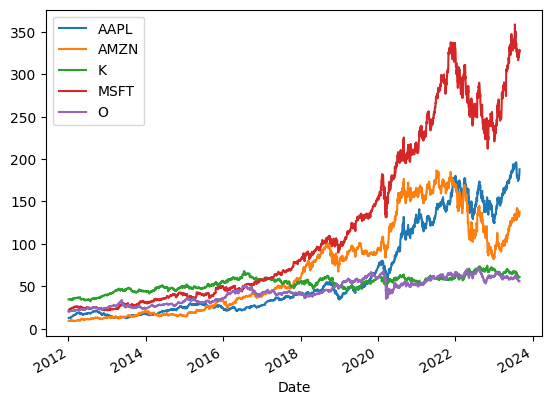

In [52]:
prices['Adj Close'].plot();

### Calculating the daily and monthly returns for individual stock


In [53]:
AAPL = yf.download("AAPL", start="2012-01-01", end="2023-09-01")

[*********************100%%**********************]  1 of 1 completed


In [54]:
AAPL['RetDaily'] = AAPL['Adj Close'].pct_change() ## daily returns
AAPL

,Open,High,Low,Close,Adj Close,Volume,RetDaily
Date,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466092,302220800,NaN
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000,0.005374
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600,0.011102
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804704,318292800,0.010454
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400,-0.001586
...,...,...,...,...,...,...,...
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600,0.012643
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700,0.008846
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900,0.021810


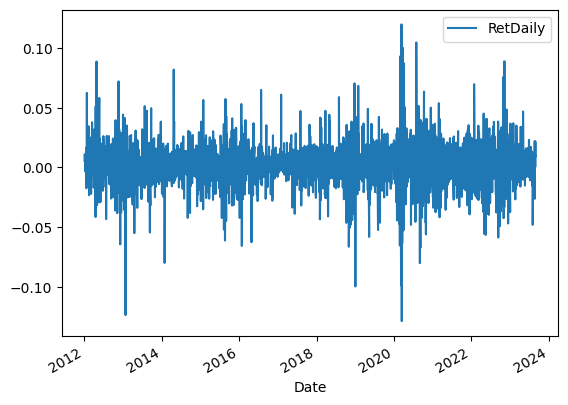

In [55]:
AAPL[['RetDaily']].plot();

Monthly returns

In [56]:
AAPL = yf.download("AAPL", start="2012-01-01", end="2023-09-01")

[*********************100%%**********************]  1 of 1 completed


In [57]:
AAPL = AAPL.resample('M').last()
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,16.271070,16.365713,16.181070,16.302856,13.837809,391683600
2012-02-29,19.341429,19.557501,19.132143,19.372856,16.443611,952011200
2012-03-31,21.741785,21.805714,21.355000,21.412500,18.174854,731038000
2012-04-30,21.350000,21.371429,20.821428,20.856428,17.702864,506144800
2012-05-31,20.740713,20.767857,20.409286,20.633215,17.513399,491674400
...,...,...,...,...,...,...
2023-04-30,168.490005,169.850006,167.880005,169.679993,169.217117,55209200
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.010971,99625300
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.708420,85069600


In [58]:
AAPL['RetMonthly'] = AAPL['Adj Close'].pct_change()
AAPL

,Open,High,Low,Close,Adj Close,Volume,RetMonthly
Date,,,,,,,
2012-01-31,16.271070,16.365713,16.181070,16.302856,13.837809,391683600,NaN
2012-02-29,19.341429,19.557501,19.132143,19.372856,16.443611,952011200,0.188310
2012-03-31,21.741785,21.805714,21.355000,21.412500,18.174854,731038000,0.105284
2012-04-30,21.350000,21.371429,20.821428,20.856428,17.702864,506144800,-0.025969
2012-05-31,20.740713,20.767857,20.409286,20.633215,17.513399,491674400,-0.010702
...,...,...,...,...,...,...,...
2023-04-30,168.490005,169.850006,167.880005,169.679993,169.217117,55209200,0.028987
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.010971,99625300,0.046058
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.708420,85069600,0.094330


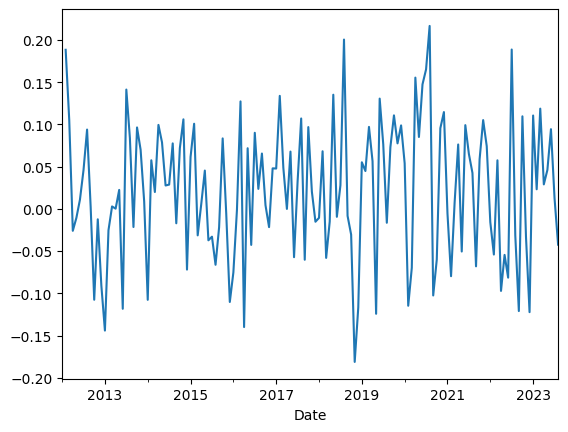

In [59]:
AAPL['RetMonthly'].plot();

Histogram plot of Apple monthly returns

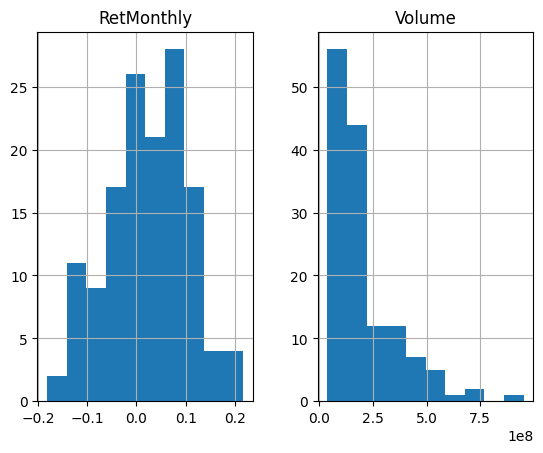

In [60]:
AAPL[['RetMonthly','Volume']].hist(bins = 10);

Calculating the cumulative returns for Apple.

In [61]:
AAPL['CumRetMonthly'] = (AAPL['RetMonthly']+1).cumprod() # cumprod(2,4,6,1) is 2,8,48,48
AAPL

,Open,High,Low,Close,Adj Close,Volume,RetMonthly,CumRetMonthly
Date,,,,,,,,
2012-01-31,16.271070,16.365713,16.181070,16.302856,13.837809,391683600,NaN,NaN
2012-02-29,19.341429,19.557501,19.132143,19.372856,16.443611,952011200,0.188310,1.188310
2012-03-31,21.741785,21.805714,21.355000,21.412500,18.174854,731038000,0.105284,1.313420
2012-04-30,21.350000,21.371429,20.821428,20.856428,17.702864,506144800,-0.025969,1.279311
2012-05-31,20.740713,20.767857,20.409286,20.633215,17.513399,491674400,-0.010702,1.265619
...,...,...,...,...,...,...,...,...
2023-04-30,168.490005,169.850006,167.880005,169.679993,169.217117,55209200,0.028987,12.228607
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.010971,99625300,0.046058,12.791835
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.708420,85069600,0.094330,13.998490


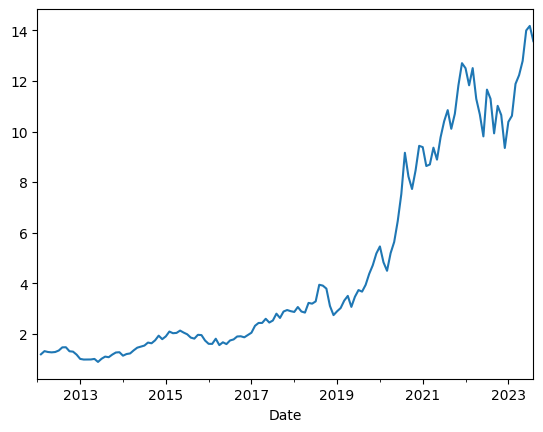

In [62]:
AAPL['CumRetMonthly'].plot();

## Calculating the returns for multiple stocks

In [63]:
tickers = ["AAPL", "MSFT", "AMZN", "K", "O"]
df_stocks = yf.download( tickers, start="2012-01-01", end="2023-09-01")

[*********************100%%**********************]  5 of 5 completed


In [64]:
df_stocks = df_stocks['Adj Close'].pct_change()
df_stocks

,AAPL,AMZN,K,MSFT,O
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.008490,-0.000991,0.023534,-0.008616
2012-01-05,0.011102,0.000563,0.001190,0.010219,0.010430
2012-01-06,0.010454,0.028152,0.000793,0.015534,-0.002580
2012-01-09,-0.001586,-0.022178,0.003960,-0.013162,0.006611
...,...,...,...,...,...
2023-08-25,0.012643,0.010771,0.006740,0.009407,-0.006388
2023-08-28,0.008846,-0.000900,0.002123,0.002229,0.008393
2023-08-29,0.021810,0.013294,0.001955,0.014550,0.000000


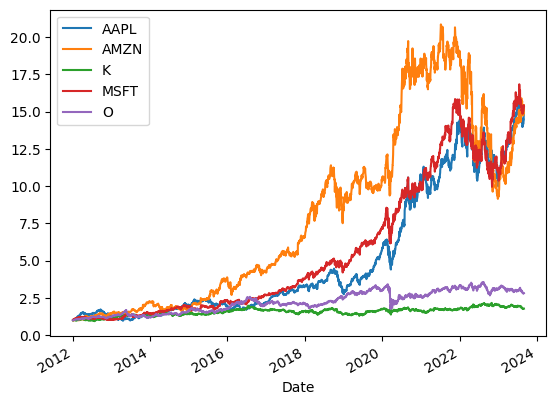

In [65]:
(df_stocks + 1).cumprod().plot();

## Summary statistics

Mean of returns

In [66]:
print(df_stocks.mean())

AAPL    0.001089
AMZN    0.001143
K       0.000273
MSFT    0.001072
O       0.000477
dtype: float64


Standard deviation of returns

In [67]:
print(df_stocks.std())

AAPL    0.018093
AMZN    0.020563
K       0.012450
MSFT    0.016737
O       0.015591
dtype: float64


Correlation and covariance matrices.

In [68]:
print(df_stocks.corr())

          AAPL      AMZN         K      MSFT         O
AAPL  1.000000  0.479115  0.188577  0.597356  0.278937
AMZN  0.479115  1.000000  0.123089  0.574163  0.200044
K     0.188577  0.123089  1.000000  0.231698  0.256586
MSFT  0.597356  0.574163  0.231698  1.000000  0.339007
O     0.278937  0.200044  0.256586  0.339007  1.000000


In [69]:
print(df_stocks.cov())

          AAPL      AMZN         K      MSFT         O
AAPL  0.000327  0.000178  0.000042  0.000181  0.000079
AMZN  0.000178  0.000423  0.000032  0.000198  0.000064
K     0.000042  0.000032  0.000155  0.000048  0.000050
MSFT  0.000181  0.000198  0.000048  0.000280  0.000088
O     0.000079  0.000064  0.000050  0.000088  0.000243


## Portfolio returns

Compute portfolio returns as a weighted average of the returns of the individual assets in the portfolio.
We will invest in the following assets

- Aggregate Bonds ETF (BND) - Vanguard Total Bond Market - with weight 10%

- Small Cap ETF (VB) - Vanguard Small-Cap Index Fund - with weight  20%

- Developed markets ETF (VEA) - VANGUARD DEVELOPED MKTS - with weight  25%

- S&P 500 ETF (VOO) - VANGUARD S&P 500 ETF - with weight 25%

- Emerging Markets ETF (VWO) - Vanguard Emerging Markets Stock Index - with weight  20%

In [70]:
symbols = ['BND','VB', 'VEA', 'VOO','VWO']

In [71]:
price_data = yf.download( symbols, start="2012-01-01", end="2023-09-01")

[*********************100%%**********************]  5 of 5 completed


But we just need the Adjusted Closing price for our returns calculations. So let's select that columns.

In [72]:
price_data = price_data['Adj Close']
print(price_data.head())

                  BND         VB        VEA        VOO        VWO
Date                                                             
2012-01-03  61.346405  59.338871  22.198946  94.203102  28.565794
2012-01-04  61.375866  59.053368  22.071894  94.364685  28.485897
2012-01-05  61.353775  59.439667  21.754261  94.671684  28.347908
2012-01-06  61.390598  59.338871  21.500154  94.477814  28.013802
2012-01-09  61.442154  59.607628  21.549568  94.623222  28.238960


The vector of weights is:

In [73]:
w = [0.1,0.2,0.25,0.25,0.2]
print(sum(w))

1.0


Now we will calculate returns of the assets in our portfolio.

In [74]:
ret_data = price_data.pct_change()[1:]
print(ret_data.head())

                 BND        VB       VEA       VOO       VWO
Date                                                        
2012-01-04  0.000480 -0.004811 -0.005723  0.001715 -0.002797
2012-01-05 -0.000360  0.006542 -0.014391  0.003253 -0.004844
2012-01-06  0.000600 -0.001696 -0.011681 -0.002048 -0.011786
2012-01-09  0.000840  0.004529  0.002298  0.001539  0.008037
2012-01-10 -0.000479  0.012679  0.016377  0.008538  0.022377


Next we can calculate the weighted returns of our assets.

In [75]:
weighted_returns = (w * ret_data)
print(weighted_returns.head())

                 BND        VB       VEA       VOO       VWO
Date                                                        
2012-01-04  0.000048 -0.000962 -0.001431  0.000429 -0.000559
2012-01-05 -0.000036  0.001308 -0.003598  0.000813 -0.000969
2012-01-06  0.000060 -0.000339 -0.002920 -0.000512 -0.002357
2012-01-09  0.000084  0.000906  0.000575  0.000385  0.001607
2012-01-10 -0.000048  0.002536  0.004094  0.002135  0.004475


The portfolio returns are simply the sum (along each row) of the weighted returns of the assets.

In [76]:
port_ret = weighted_returns.sum(axis=1)
# "axis = 1" means we want to sum along the rows
print(port_ret)

Date
2012-01-04   -0.002476
2012-01-05   -0.002481
2012-01-06   -0.006068
2012-01-09    0.003557
2012-01-10    0.013192
                ...   
2023-08-25    0.003940
2023-08-28    0.008155
2023-08-29    0.013029
2023-08-30    0.001157
2023-08-31   -0.003378
Length: 2934, dtype: float64


Portfolio mean, standard deviation

In [77]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)
print(std_returns)

0.00035958089802450965
0.009696133865509998


Portfolio Sharpe ratio (assuming rf=0)

In [78]:
sharpe_ratio = mean_ret/std_returns
sharpe_ratio_annual = sharpe_ratio * np.sqrt(252)
print("Daily SR is ", sharpe_ratio )
print("Annual SR is ", sharpe_ratio_annual )

Daily SR is  0.037084976652763696
Annual SR is  0.5887057535990957


To calculate cumulative returns we need to use the cumprod() function.



In [79]:
cumulative_ret = (port_ret + 1).cumprod()
cumulative_ret

Date
2012-01-04    0.997524
2012-01-05    0.995050
2012-01-06    0.989011
2012-01-09    0.992529
2012-01-10    1.005622
                ...   
2023-08-25    2.453038
2023-08-28    2.473042
2023-08-29    2.505263
2023-08-30    2.508161
2023-08-31    2.499688
Length: 2934, dtype: float64

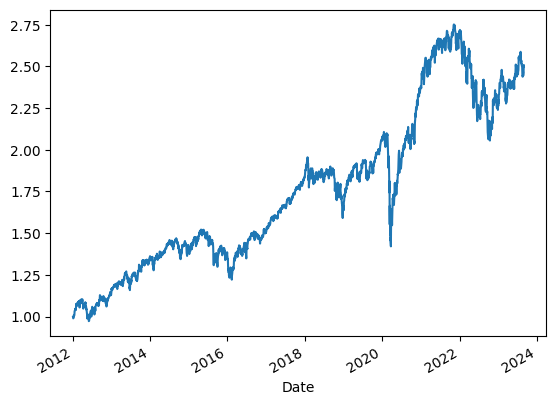

In [80]:
cumulative_ret.plot();

# Portfolio Beta

## Download stock prices and compute returns

In [81]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [82]:
tickers = ['AMZN', 'AAPL', 'NFLX', 'XOM', 'T']

In [83]:
prices = yf.download(tickers, start="2012-01-01", end="2023-09-01")
w = [0.1,0.2,0.25,0.25,0.2]
ret_data = prices['Adj Close'].pct_change()[1:]
print(ret_data.head())

[*********************100%%**********************]  5 of 5 completed
                AAPL      AMZN      NFLX         T       XOM
Date                                                        
2012-01-04  0.005374 -0.008490  0.113649  0.001646  0.000233
2012-01-05  0.011102  0.000563 -0.014295 -0.000986 -0.003022
2012-01-06  0.010454  0.028152  0.088146 -0.004609 -0.007463
2012-01-09 -0.001586 -0.022178  0.137791 -0.000674  0.004464
2012-01-10  0.003580  0.004368 -0.023936  0.003371  0.002573


Next we can calculate the weighted returns of our assets.

In [84]:
weighted_returns = (w * ret_data)
print(weighted_returns.head())

                AAPL      AMZN      NFLX         T       XOM
Date                                                        
2012-01-04  0.000537 -0.001698  0.028412  0.000411  0.000047
2012-01-05  0.001110  0.000113 -0.003574 -0.000246 -0.000604
2012-01-06  0.001045  0.005630  0.022037 -0.001152 -0.001493
2012-01-09 -0.000159 -0.004436  0.034448 -0.000169  0.000893
2012-01-10  0.000358  0.000874 -0.005984  0.000843  0.000515


The portfolio returns are simply the sum (along each row) of the weighted returns of the assets.

In [85]:
port_ret = weighted_returns.sum(axis=1)
print(port_ret.head())

Date
2012-01-04    0.027710
2012-01-05   -0.003202
2012-01-06    0.026067
2012-01-09    0.030578
2012-01-10   -0.003395
dtype: float64


In [86]:
from scipy import stats
import seaborn as sns

In order to calculate the portfolio beta, we need to regress the portfolio (excess) returns against the market (excess) returns. To do that, we will use S&P 500 etf as a proxy for our market portfolio. We assume that the risk free rate is zero.

In [87]:
benchmark_price = yf.download("SPY", start="2012-01-01", end="2023-09-01") # We assume that the risk free rate is zero.
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]
benchmark_ret

[*********************100%%**********************]  1 of 1 completed


Date
2012-01-04    0.001569
2012-01-05    0.002662
2012-01-06   -0.002577
2012-01-09    0.002427
2012-01-10    0.008671
                ...   
2023-08-25    0.007050
2023-08-28    0.006341
2023-08-29    0.014455
2023-08-30    0.004119
2023-08-31   -0.001463
Name: Adj Close, Length: 2934, dtype: float64

Once we have the benchmark returns, we can visualize the scatter plot of our portfolio returns versus benchmark returns.

In [ ]:
sns.regplot(x=benchmark_ret, y=port_ret, ci = None);

We can see that our portfolio returns are highly correlated to the benchmark returns. We can estimate a linear regression model to calculate the portfolio beta and the portfolio alpha.

In [ ]:
result = stats.linregress(benchmark_ret, port_ret)
result

In [ ]:
(beta, alpha) = stats.linregress(benchmark_ret.values, port_ret.values)[0:2]
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha,5))

# Portfolio Optimization - Part 1 (loop)

In [ ]:
tickers = ["AAPL", "MSFT", "AMZN", "K", "O"]
prices = yf.download( tickers, start="2015-01-01", end="2023-09-01")

In [ ]:
prices = prices['Adj Close']
ret = prices.pct_change()[1:]
print(ret)

In [ ]:
cov_mat = ret.cov()
print(cov_mat)

Next we will jump right into the for loop and simulate the portfolio returns and risk on 10000 random portfolios.

In [ ]:
len(prices.columns)

In [ ]:
# Simulating 10000 portfolios
num_port = 10000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(prices.columns)))
# Creating an empty array to store mean portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

Let's run the for loop.

In [ ]:
for i in range(num_port):
    wts = np.random.uniform(size = len(prices.columns))
    wts = wts/np.sum(wts)

    # saving weights in the array
    all_wts[i,:] = wts

    # Portfolio Returns
    port_returns[i] = np.sum(ret.mean() * wts)

    # Saving Portfolio returns
    port_ret = port_returns[i]

    # Portfolio Risk
    port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
    port_risk[i] = port_sd

    # Portfolio Sharpe Ratio (assuming 0% Risk Free Rate)
    sr = port_ret / port_sd
    sharpe_ratio[i] = sr

We will start by getting the minimum variance portfolio and the tangency portfolio.

In [ ]:
sharpe_ratio

In [ ]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

In [ ]:
sharpe_ratio.argmax() ## position of the max sr in the vector

In [ ]:
min_var = all_wts[port_risk.argmin()]
print(min_var)

Let's see the max sharpe ratio and the minimum risk for these portfolios

In [ ]:
print(sharpe_ratio.max())
print(sharpe_ratio.max() * np.sqrt(252))

In [ ]:
print(port_risk.min())

Now lets visualize the weights of the portfolio. First we will visualize the minimum variance portfolio.

In [ ]:
names = prices.columns
names

In [ ]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

Next we will visualize the max sharpe ratio portfolio (tangency portfolio).

In [ ]:
max_sr = pd.Series(max_sr, index=names) # pd.series to create One-dimensional ndarray with axis labels
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();

Finally we can plot all the 10000 portfolios.

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns, alpha=0.5, s=1) # Use `alpha` and `s` to control the opacitiy and size of the dots
plt.show();

With matrix approach:

tangency portfolio: $x_T = \frac{S^{-1}(\mu-r_f)}{\iota' S^{-1}(\mu-r_f)}$

In [ ]:
weigths = np.dot(np.linalg.inv(ret.cov()) , np.nanmean(ret.to_numpy(),axis=0)) # max sharpe ratio
weigths/np.sum(weigths)

minimum variance portfolio: $x_{GMV} = \frac{S^{-1}\iota}{\iota' S^{-1}\iota}$



In [ ]:
weigths = np.dot(np.linalg.inv(ret.cov()) , np.ones(5)) # min variance
weigths/np.sum(weigths)

# Portfolio Optimization - Part 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Let's now move on from random allocations to a mathematical optimization algorithm.
All of the heavy lifting for this optimization will be done with SciPy, so we just have to do a few things to set up the optimization function. Let's start with a simple function that takes in weights and returns back an array consisting of returns, volatility, and the Sharpe Ratio. We define the function as **get_ret_vol_sr** and pass in weights.
We make sure that weights are a Numpy array.
We calculate return, volatility, and the Sharpe Ratio.
The fuction returns an array of return, volatility, and the Sharpe Ratio.

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights) # to check that weights is a numpy array
    port_return = np.sum(ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T,np.dot(ret.cov(),weights)))
    sr = port_return/vol
    return np.array([port_return,vol,sr])

In [ ]:
# Helper functions
#  takes in weights and returns the output with index 2 of our get_ret_vol_sr function (the Sharpe Ratio)
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * (-1)
# negative sharpe ratio (that we want to minimize and not maximize)
def volatility(weights):
    return get_ret_vol_sr(weights)[1]
# var is the output number 1 (first has index = 0) of the function
def check_sum(weights):
    return np.sum(weights) - 1

In [ ]:
cons = ({'type':'eq','fun':check_sum}) #  we're going to create a variable called cons, which is a tuple with a dictionary inside of it. eq means equality
# create weight boundaries
bounds = ((-1,1),(-1,1),(-1,1),(-1,1),(-1,1))
# initial guess
init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]

In [ ]:
# Sequential Least Squares Programming (SLSQP)
opt_results_maxsr = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results_maxsr)

In [ ]:
opt_results_minvol = minimize(volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results_minvol)

# Factor Analysis

## How to download Fama French 3 factors data

Once we have imported the modules, we are ready to download the files from the website. This is the website to download the zip file (https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip). We can also se a python module: getFamaFrenchFactors.

In [ ]:
pip install getFamaFrenchFactors

In [ ]:
import getFamaFrenchFactors as gff

# Get the Fama French 3 factor model - monthly data
ff_factors = gff.famaFrench3Factor(frequency='m')

In [ ]:
ff_factors

In [ ]:
ff_factors = ff_factors.rename(columns={"date_ff_factors": "Date", "Mkt-RF": "mkt_excess"})

In [ ]:
ff_factors

We need to import another library

In [ ]:
# Statsmodels to run our multiple regression model
import statsmodels.api as smf

Compute returns of mutual fund

In [ ]:
def get_returns(ticker, st, en, frequency):
    price = yf.download(ticker, st, en)
    price = price['Adj Close'] # keep only the Adj Close Price variable
    # Resample the data
    price = price.resample(frequency).last()
    # Calculate the percent change
    ret_data = price.pct_change()[1:] # we keep from the second row onwards
    # convert from series to DataFrame
    ret_data = pd.DataFrame(ret_data)
    ret_data = ret_data.rename(columns={"Adj Close": "portfolio"})
    return ret_data

In [ ]:
# iShares MSCI USA Value Factor ETF (VLUE)
# Vanguard Small-Cap Index Fund (VB)
ret_data = get_returns("VB", "2005-01-01", "2023-09-01", "M").reset_index()
ret_data

Merge the portfolio return data with Fama French data.

In [ ]:
# Merging the data (inner: use intersection of keys from both frames; preserve the order of the left keys.)
all_data = pd.merge(ret_data,ff_factors, how = 'inner', on = 'Date')
# Calculate the excess returns
all_data['port_excess'] = all_data['portfolio'] - all_data['RF']
print(all_data.tail())

Run the multiple regression model (HC3 is required for heteroscedasticity-consistent standard errors)

In [ ]:
model = smf.formula.ols(formula = "port_excess ~ mkt_excess + SMB + HML", data = all_data).fit(cov_type='HC3')
print(model.summary())

In [ ]:
# sharpe ratio of the sp500
prices = yf.download( "SPY", start="1990-01-01", end="2023-09-01")
ret = prices['Adj Close'].pct_change()
sr = np.mean(ret) / (np.std(ret))
print(sr * np.sqrt(252))